Topic: Maryland Housing Model

Personal Project

Garrett Fanning

# Introduction

# Data Description

## Source

https://www.census.gov/programs-surveys/popest/data/tables.html
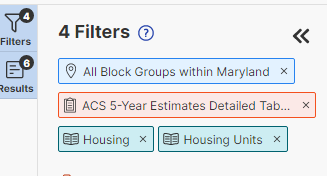

https://data.census.gov/cedsci/

## Feature Breakdown

**Housing** - Number of houses in a block
<br> **Population** - Population in a block
<br> **Earnings** - Median Earnings in a block
<br> **Poverty** - Number living in poverty(based on Census income threshold) in a block
<br> **Employment** - Number of people employed in a block
<br> **Rooms** - Median number of rooms per house in a block
<br> **Children** - Number of children in a block
<br> **HouseType** - Number of houses occupied
<br> **Age** - Median Age of a block
<br> **Transportation** - Median length of commute to work
<br> **HousePrice** - Median price of a home in a block
<br> **School** - Number of schools in a block

# Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

Maryland_2021 = pd.read_excel('Maryland_2021.xlsx',skiprows = [0,1,2],names = ['City','Remove','2020_Population','2021_Population'])
Maryland_2021

#Drop remove column, remove last 5 rows
N=6
Maryland_2021 = Maryland_2021.iloc[0:-N]
Maryland_2021 = Maryland_2021.drop(['Remove'],axis = 1)
Maryland_2021['City'] = Maryland_2021['City'].str.replace(", Maryland","")

Maryland_2021

,City,2020_Population,2021_Population
0,Aberdeen city,16229.0,16889.0
1,Accident town,338.0,338.0
2,Annapolis city,40833.0,40687.0
3,Baltimore city,583132.0,576498.0
4,Barclay town,184.0,185.0
...,...,...,...
151,Washington Grove town,502.0,498.0
152,Westernport town,1777.0,1767.0
153,Westminster city,19960.0,20062.0
154,Willards town,952.0,957.0


# Data Breakdown

## Maryland Housing Data

In [3]:
Maryland_Housing = pd.read_csv('Maryland_Housing_2020.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing = Maryland_Housing[2:]
Maryland_Housing['Units'] = Maryland_Housing['Units'].astype(float)
Maryland_Housing

,Units,Unit_Error,GEO_ID,Name
2,635.0,129,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
3,999.0,144,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
4,609.0,111,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
5,605.0,166,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
6,486.0,117,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County..."
...,...,...,...,...
4076,274.0,78,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4077,262.0,77,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4078,518.0,116,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4079,508.0,105,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


In [4]:
Maryland_Housing.describe()

,Units
count,4079.000000
mean,603.003187
std,314.867946
min,0.000000
25%,393.000000
50%,557.000000
75%,762.500000
max,5627.000000


([<matplotlib.axis.XTick at 0x1c5854dc280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

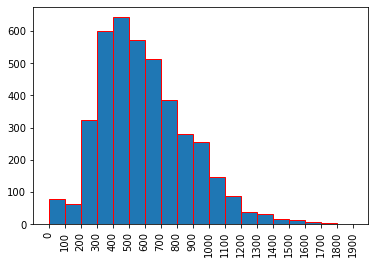

In [5]:
#See distribution of score column that will be used in the calculation of the response variable
import matplotlib
import matplotlib.pyplot as plt

Maryland_Housing_Sort = Maryland_Housing.sort_values(by = 'Units')

plt.hist(Maryland_Housing_Sort['Units'],edgecolor = "red", bins=range(0,2000,100))
plt.xticks(range(0,2000,100), rotation=90)

## Maryland Population Data

In [11]:
from itertools import chain

Maryland_Population_2013 = pd.read_csv('Maryland_Population_2013.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2013 = Maryland_Population_2013[2:]
Maryland_Population_2013['Year'] = 2013

Maryland_Population_2014 = pd.read_csv('Maryland_Population_2014.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2014 = Maryland_Population_2014[2:]
Maryland_Population_2014['Year'] = 2014

Maryland_Population_2015 = pd.read_csv('Maryland_Population_2015.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2015 = Maryland_Population_2015[2:]
Maryland_Population_2015['Year'] = 2015

Maryland_Population_2016 = pd.read_csv('Maryland_Population_2016.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2016 = Maryland_Population_2016[2:]
Maryland_Population_2016['Year'] = 2016

Maryland_Population_2017 = pd.read_csv('Maryland_Population_2017.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2017 = Maryland_Population_2017[2:]
Maryland_Population_2017['Year'] = 2017

Maryland_Population_2017 = pd.read_csv('Maryland_Population_2017.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2017 = Maryland_Population_2017[2:]
Maryland_Population_2017['Year'] = 2017

Maryland_Population_2018 = pd.read_csv('Maryland_Population_2018.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2018 = Maryland_Population_2018[2:]
Maryland_Population_2018['Year'] = 2018

Maryland_Population_2019 = pd.read_csv('Maryland_Population_2019.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2019 = Maryland_Population_2019[2:]
Maryland_Population_2019['Year'] = 2019

Maryland_Population_2020 = pd.read_csv('Maryland_Population_2020.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2020 = Maryland_Population_2020[2:]
Maryland_Population_2020['Year'] = 2020

Maryland_Population_Combined = Maryland_Population_2013.append(Maryland_Population_2014).append(Maryland_Population_2015).append(Maryland_Population_2016).append(Maryland_Population_2017).append(Maryland_Population_2018).append(Maryland_Population_2019).append(Maryland_Population_2020)
Maryland_Population_Combined

,Population,Population_Error,GEO_ID,Name,Year
2,620,183,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
3,1700,262,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
4,1257,321,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
5,933,206,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
6,739,165,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...,...
4076,333,109,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4077,481,220,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4078,1023,389,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4079,1238,371,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [28]:
Maryland_Population = Maryland_Population_Combined.drop("Population_Error",axis = 1)
Maryland_Population['Population'] = Maryland_Population['Population'].astype(int).astype(float)
Maryland_Population

,Population,GEO_ID,Name,Year
2,620.0,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
3,1700.0,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
4,1257.0,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
5,933.0,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
6,739.0,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...
4076,333.0,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4077,481.0,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4078,1023.0,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4079,1238.0,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [31]:
Maryland_Population = Maryland_Population.loc[(Maryland_Population['Population']>0)]
Maryland_Population['Population'].describe()

count    31353.000000
mean      1520.380857
std        805.315046
min          3.000000
25%        939.000000
50%       1366.000000
75%       1955.000000
max      13709.000000
Name: Population, dtype: float64

([<matplotlib.axis.XTick at 0x26212d60ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

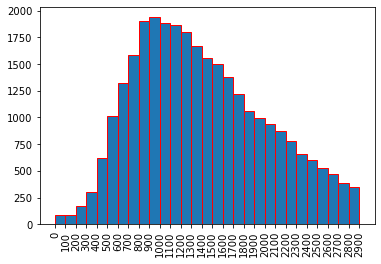

In [32]:
Maryland_Population = Maryland_Population.sort_values(by = 'Population')

plt.hist(Maryland_Population['Population'],edgecolor = "red", bins=range(0,3000,100))
plt.xticks(range(0,3000,100), rotation=90)

In [38]:
Maryland_Population.loc[(Maryland_Population['Population']>Maryland_Population['Population'].mean())].shape[0]/len(Maryland_Population)

0.42196918955123913

In [45]:
Maryland_Population.loc[(Maryland_Population['Population']==Maryland_Population['Population'].max()),('Name','Year')]

,Name,Year
3083,"Block Group 1, Census Tract 9800, Prince Georg...",2020


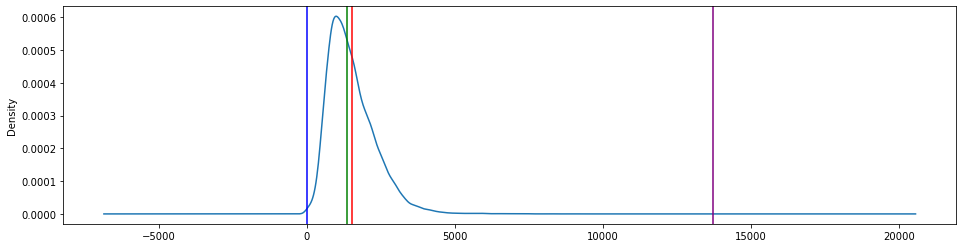

In [46]:
ax = Maryland_Population['Population'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Population['Population'].mean(),color='red')
ax.axvline(Maryland_Population['Population'].median(),color='green')
ax.axvline(Maryland_Population['Population'].min(),color='blue')
ax.axvline(Maryland_Population['Population'].max(),color='purple')

## Maryland Earnings Data

In [9]:
Maryland_Earnings = pd.read_csv('Maryland_Earnings_2020.csv')
Maryland_Earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   B20017_001E  4080 non-null   object
 1   B20017_001M  4080 non-null   object
 2   B20017_002E  4080 non-null   object
 3   B20017_002M  4080 non-null   object
 4   B20017_003E  4080 non-null   object
 5   B20017_003M  4080 non-null   object
 6   B20017_004E  4080 non-null   object
 7   B20017_004M  4080 non-null   object
 8   B20017_005E  4080 non-null   object
 9   B20017_005M  4080 non-null   object
 10  B20017_006E  4080 non-null   object
 11  B20017_006M  4080 non-null   object
 12  B20017_007E  4080 non-null   object
 13  B20017_007M  4080 non-null   object
 14  GEO_ID       4080 non-null   object
 15  NAME         4080 non-null   object
dtypes: object(16)
memory usage: 510.1+ KB


In [10]:
Maryland_Earnings = pd.read_csv('Maryland_Earnings_2020.csv')
Maryland_Earnings = Maryland_Earnings[1:]

Maryland_Earnings_Sort = Maryland_Earnings[["B20017_001E","GEO_ID","NAME"]]

Maryland_Earnings_Sort = Maryland_Earnings_Sort.rename(columns = {"B20017_001E":"Earnings","GEO_ID":"GEO_ID","NAME":"Name"})
#for x in Maryland_Earnings_Sort:
    #if(Maryland_Earnings_Sort[x,0]=='-'):
       # Maryland_Earnings_Sort[x,0]= ''

Maryland_Earnings_Sort=Maryland_Earnings_Sort.sort_values(by="Earnings")
Maryland_Earnings_Sort

,Earnings,GEO_ID,Name
2072,-,1500000US240317008362,"Block Group 2, Census Tract 7008.36, Montgomer..."
3765,-,1500000US245102008001,"Block Group 1, Census Tract 2008, Baltimore ci..."
3068,-,1500000US240338074073,"Block Group 3, Census Tract 8074.07, Prince Ge..."
3091,-,1500000US240358104002,"Block Group 2, Census Tract 8104, Queen Anne's..."
3115,-,1500000US240359900000,"Block Group 0, Census Tract 9900, Queen Anne's..."
...,...,...,...
1969,99583,1500000US240317006162,"Block Group 2, Census Tract 7006.16, Montgomer..."
93,99643,1500000US240037024023,"Block Group 3, Census Tract 7024.02, Anne Arun..."
959,99688,1500000US240098602001,"Block Group 1, Census Tract 8602, Calvert Coun..."
1367,99688,1500000US240217512032,"Block Group 2, Census Tract 7512.03, Frederick..."


In [11]:
Maryland_Earnings_Sort['Earnings'] = Maryland_Earnings_Sort['Earnings'].replace('-','.0')
Maryland_Earnings_Sort['Earnings'] = Maryland_Earnings_Sort['Earnings'].replace('2,500-','2500')

In [12]:
Maryland_Earnings_Sort

,Earnings,GEO_ID,Name
2072,.0,1500000US240317008362,"Block Group 2, Census Tract 7008.36, Montgomer..."
3765,.0,1500000US245102008001,"Block Group 1, Census Tract 2008, Baltimore ci..."
3068,.0,1500000US240338074073,"Block Group 3, Census Tract 8074.07, Prince Ge..."
3091,.0,1500000US240358104002,"Block Group 2, Census Tract 8104, Queen Anne's..."
3115,.0,1500000US240359900000,"Block Group 0, Census Tract 9900, Queen Anne's..."
...,...,...,...
1969,99583,1500000US240317006162,"Block Group 2, Census Tract 7006.16, Montgomer..."
93,99643,1500000US240037024023,"Block Group 3, Census Tract 7024.02, Anne Arun..."
959,99688,1500000US240098602001,"Block Group 1, Census Tract 8602, Calvert Coun..."
1367,99688,1500000US240217512032,"Block Group 2, Census Tract 7512.03, Frederick..."


In [13]:
Maryland_Earnings_Sort = Maryland_Earnings_Sort.sort_values(by = 'Earnings')
Maryland_Earnings_Sort['Earnings'] = Maryland_Earnings_Sort['Earnings'].astype(str).astype(float)
Maryland_Earnings_Sort.describe()

,Earnings
count,4079.000000
mean,47730.443001
std,23248.275753
min,0.000000
25%,33739.500000
50%,45313.000000
75%,59303.500000
max,168281.000000


In [14]:
Maryland_Earnings_Sort = Maryland_Earnings_Sort.loc[(Maryland_Earnings_Sort['Earnings']>0)]
Maryland_Earnings_Sort['Earnings'].describe()

count      3878.000000
mean      50204.351986
std       21077.717418
min        2500.000000
25%       35717.750000
50%       46526.500000
75%       60408.250000
max      168281.000000
Name: Earnings, dtype: float64

In [15]:
Maryland_Earnings_Sort.loc[(Maryland_Earnings_Sort['Earnings']>Maryland_Earnings_Sort['Earnings'].mean())].shape[0]

1675

In [16]:
Maryland_Earnings_Sort.loc[(Maryland_Earnings_Sort['Earnings']==Maryland_Earnings_Sort['Earnings'].max()),'Name'].unique()

array(['Block Group 2, Census Tract 7055.02, Montgomery County, Maryland'],
      dtype=object)

([<matplotlib.axis.XTick at 0x1c585d72fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

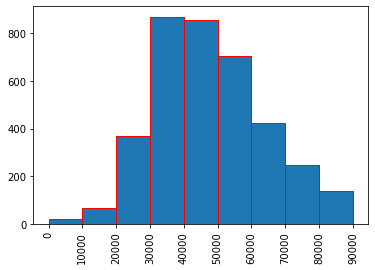

In [17]:
Maryland_Earnings_Sort = Maryland_Earnings_Sort.sort_values(by = 'Earnings')

plt.hist(Maryland_Earnings_Sort['Earnings'],edgecolor = "red", bins=range(0,100000,10000))
plt.xticks(range(0,100000,10000), rotation=90)

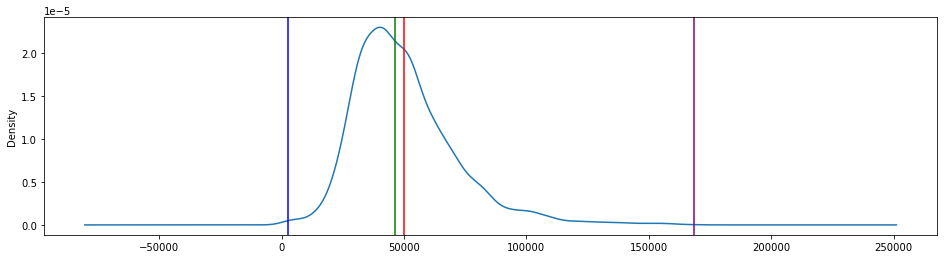

In [18]:
ax = Maryland_Earnings_Sort['Earnings'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Earnings_Sort['Earnings'].mean(),color='red')
ax.axvline(Maryland_Earnings_Sort['Earnings'].median(),color='green')
ax.axvline(Maryland_Earnings_Sort['Earnings'].min(),color='blue')
ax.axvline(Maryland_Earnings_Sort['Earnings'].max(),color='purple')

## Maryland Poverty Data

In [19]:
Maryland_Poverty = pd.read_csv('Maryland_Poverty_2020.csv')
Maryland_Poverty_Sort = Maryland_Poverty[1:]
Maryland_Poverty_Sort = Maryland_Poverty_Sort[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_Sort = Maryland_Poverty_Sort.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_Sort= Maryland_Poverty_Sort.sort_values(by="Poverty")
Maryland_Poverty_Sort

,Poverty,GEO_ID,Name
306,0,1500000US240037404001,"Block Group 1, Census Tract 7404, Anne Arundel..."
1271,0,1500000US240179900000,"Block Group 0, Census Tract 9900, Charles Coun..."
1261,0,1500000US240178513023,"Block Group 3, Census Tract 8513.02, Charles C..."
2253,0,1500000US240317015093,"Block Group 3, Census Tract 7015.09, Montgomer..."
2006,0,1500000US240317007242,"Block Group 2, Census Tract 7007.24, Montgomer..."
...,...,...,...
1171,998,1500000US240150312012,"Block Group 2, Census Tract 312.01, Cecil Coun..."
2775,999,1500000US240338018083,"Block Group 3, Census Tract 8018.08, Prince Ge..."
413,999,1500000US240054009001,"Block Group 1, Census Tract 4009, Baltimore Co..."
1266,999,1500000US240178514031,"Block Group 1, Census Tract 8514.03, Charles C..."


In [20]:
Maryland_Poverty_Sort['Poverty'] = Maryland_Poverty_Sort['Poverty'].astype(str).astype(float)
Maryland_Poverty_Sort = Maryland_Poverty_Sort.loc[(Maryland_Poverty_Sort['Poverty']>0)]
Maryland_Poverty_Sort['Poverty'].describe()

count    4022.000000
mean      880.945301
std       458.091680
min         6.000000
25%       544.250000
50%       805.000000
75%      1132.000000
max      4235.000000
Name: Poverty, dtype: float64

In [21]:
Maryland_Poverty_Sort.loc[(Maryland_Poverty_Sort['Poverty']>Maryland_Poverty_Sort['Poverty'].mean())].shape[0]

1738

In [22]:
Maryland_Poverty_Sort.loc[(Maryland_Poverty_Sort['Poverty']==Maryland_Poverty_Sort['Poverty'].max()),'Name'].unique()

array(['Block Group 1, Census Tract 8509.04, Charles County, Maryland'],
      dtype=object)

([<matplotlib.axis.XTick at 0x1c5872177f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

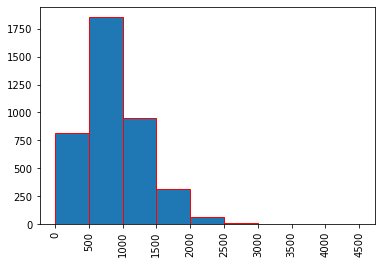

In [23]:
Maryland_Poverty_Sort = Maryland_Poverty_Sort.sort_values(by = 'Poverty')

plt.hist(Maryland_Poverty_Sort['Poverty'],edgecolor = "red", bins=range(0,5000,500))
plt.xticks(range(0,5000,500), rotation=90)

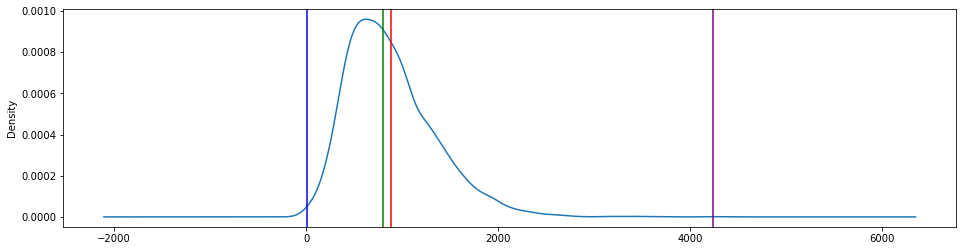

In [24]:
ax = Maryland_Poverty_Sort['Poverty'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Poverty_Sort['Poverty'].mean(),color='red')
ax.axvline(Maryland_Poverty_Sort['Poverty'].median(),color='green')
ax.axvline(Maryland_Poverty_Sort['Poverty'].min(),color='blue')
ax.axvline(Maryland_Poverty_Sort['Poverty'].max(),color='purple')

## Maryland Employment Data

In [25]:
Maryland_Employment = pd.read_csv('Maryland_Employment_2020.csv')
Maryland_Employment_Sort = Maryland_Employment[1:]
Maryland_Employment_Sort = Maryland_Employment_Sort[["B23025_001E","GEO_ID","NAME"]]
Maryland_Employment_Sort = Maryland_Employment_Sort.rename(columns = {"B23025_001E":"Employment","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Employment_Sort= Maryland_Employment_Sort.sort_values(by="Employment")
Maryland_Employment_Sort

,Employment,GEO_ID,Name
2683,0,1500000US240338011061,"Block Group 1, Census Tract 8011.06, Prince Ge..."
3789,0,1500000US245102404002,"Block Group 2, Census Tract 2404, Baltimore ci..."
2043,0,1500000US240317008184,"Block Group 4, Census Tract 7008.18, Montgomer..."
3288,0,1500000US240430108023,"Block Group 3, Census Tract 108.02, Washington..."
3117,0,1500000US240359902000,"Block Group 0, Census Tract 9902, Queen Anne's..."
...,...,...,...
2007,997,1500000US240317007243,"Block Group 3, Census Tract 7007.24, Montgomer..."
2823,997,1500000US240338023013,"Block Group 3, Census Tract 8023.01, Prince Ge..."
1023,998,1500000US240135010023,"Block Group 3, Census Tract 5010.02, Carroll C..."
3970,999,1500000US245102709023,"Block Group 3, Census Tract 2709.02, Baltimore..."


In [26]:
Maryland_Employment_Sort['Employment'] = Maryland_Employment_Sort['Employment'].astype(str).astype(float)
Maryland_Employment_Sort = Maryland_Employment_Sort.loc[(Maryland_Employment_Sort['Employment']>0)]
Maryland_Employment_Sort['Employment'].describe()

count     4036.000000
mean      1200.712587
std        627.781155
min          7.000000
25%        764.000000
50%       1096.500000
75%       1527.250000
max      13659.000000
Name: Employment, dtype: float64

In [27]:
Maryland_Employment_Sort.loc[(Maryland_Employment_Sort['Employment']>Maryland_Employment_Sort['Employment'].mean())].shape[0]

1750

In [28]:
Maryland_Employment_Sort.loc[(Maryland_Employment_Sort['Employment']==Maryland_Employment_Sort['Employment'].max()),'Name'].unique()

array(["Block Group 1, Census Tract 9800, Prince George's County, Maryland"],
      dtype=object)

([<matplotlib.axis.XTick at 0x1c5887efb50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

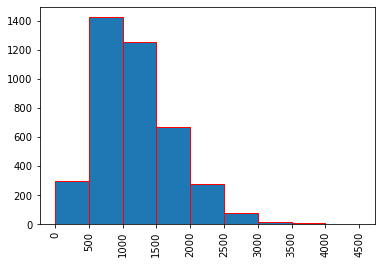

In [29]:
Maryland_Employment_Sort = Maryland_Employment_Sort.sort_values(by = 'Employment')

plt.hist(Maryland_Employment_Sort['Employment'],edgecolor = "red", bins=range(0,5000,500))
plt.xticks(range(0,5000,500), rotation=90)

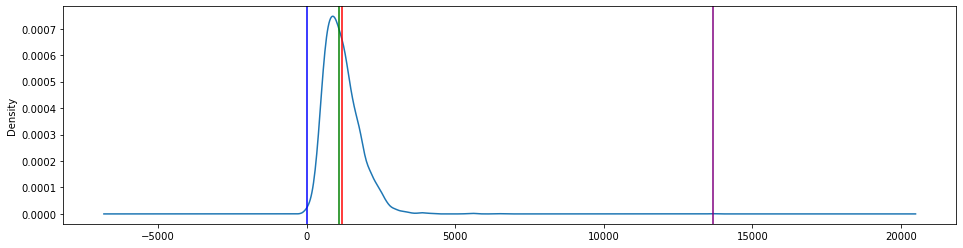

In [30]:
ax = Maryland_Employment_Sort['Employment'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Employment_Sort['Employment'].mean(),color='red')
ax.axvline(Maryland_Employment_Sort['Employment'].median(),color='green')
ax.axvline(Maryland_Employment_Sort['Employment'].min(),color='blue')
ax.axvline(Maryland_Employment_Sort['Employment'].max(),color='purple')

## Maryland Rooms Data

In [32]:
Maryland_Rooms = pd.read_csv('Maryland_Rooms_2020.csv')
Maryland_Rooms_Sort = Maryland_Rooms[1:]
Maryland_Rooms_Sort = Maryland_Rooms_Sort[["B25018_001E","GEO_ID","NAME"]]
Maryland_Rooms_Sort = Maryland_Rooms_Sort.rename(columns = {"B25018_001E":"Rooms","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Rooms_Sort= Maryland_Rooms_Sort.sort_values(by="Rooms")
Maryland_Rooms_Sort

,Rooms,GEO_ID,Name
393,-,1500000US240039900000,"Block Group 0, Census Tract 9900, Anne Arundel..."
3115,-,1500000US240359900000,"Block Group 0, Census Tract 9900, Queen Anne's..."
3116,-,1500000US240359901000,"Block Group 0, Census Tract 9901, Queen Anne's..."
3117,-,1500000US240359902000,"Block Group 0, Census Tract 9902, Queen Anne's..."
3180,-,1500000US240379900000,"Block Group 0, Census Tract 9900, St. Mary's C..."
...,...,...,...
1639,9.0+,1500000US240253036051,"Block Group 1, Census Tract 3036.05, Harford C..."
1642,9.0+,1500000US240253036061,"Block Group 1, Census Tract 3036.06, Harford C..."
2134,9.0+,1500000US240317012102,"Block Group 2, Census Tract 7012.10, Montgomer..."
2135,9.0+,1500000US240317012103,"Block Group 3, Census Tract 7012.10, Montgomer..."


In [33]:
Maryland_Rooms_Sort['Rooms'] = Maryland_Rooms_Sort['Rooms'].replace('-','.0')
Maryland_Rooms_Sort['Rooms'] = Maryland_Rooms_Sort['Rooms'].replace('9.0+','0')

In [34]:
Maryland_Rooms_Sort['Rooms'] = Maryland_Rooms_Sort['Rooms'].astype(str).astype(float)
Maryland_Rooms_Sort = Maryland_Rooms_Sort.loc[(Maryland_Rooms_Sort['Rooms']>0)]
Maryland_Rooms_Sort['Rooms'].describe()

count    3580.000000
mean        6.106704
std         1.338066
min         1.400000
25%         5.200000
50%         6.200000
75%         7.100000
max         8.500000
Name: Rooms, dtype: float64

## Maryland Children Data

In [49]:
Maryland_Children = pd.read_csv('Maryland_Children_2020.csv')
Maryland_Children

,B11005_001E,B11005_001M,B11005_002E,B11005_002M,B11005_003E,B11005_003M,B11005_004E,B11005_004M,B11005_005E,B11005_005M,...,B11005_016E,B11005_016M,B11005_017E,B11005_017M,B11005_018E,B11005_018M,B11005_019E,B11005_019M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,id,Geographic Area Name
1,370,104,59,45,59,45,46,42,13,20,...,9,13,195,91,141,84,54,39,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,793,140,222,69,222,69,149,57,73,53,...,20,22,203,88,108,70,95,51,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,412,72,105,47,105,47,82,41,23,28,...,0,13,56,32,19,22,37,26,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,366,160,39,37,39,37,23,25,16,23,...,0,13,132,71,98,63,34,24,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,241,73,0,13,0,13,0,13,0,13,...,11,11,204,72,119,61,85,53,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,231,71,47,53,47,53,0,13,47,53,...,19,28,159,60,42,35,117,55,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,484,119,186,94,186,94,0,13,186,94,...,31,43,251,81,56,42,195,74,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,474,105,185,73,185,73,0,13,185,73,...,61,43,213,87,85,58,128,67,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland HouseType Data

In [50]:
Maryland_HouseType = pd.read_csv('Maryland_HouseType_2020.csv')
Maryland_HouseType

,B11016_001E,B11016_001M,B11016_002E,B11016_002M,B11016_003E,B11016_003M,B11016_004E,B11016_004M,B11016_005E,B11016_005M,...,B11016_013E,B11016_013M,B11016_014E,B11016_014M,B11016_015E,B11016_015M,B11016_016E,B11016_016M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Family households:,Margin of Error!!Total:!!Family households:,Estimate!!Total:!!Family households:!!2-person...,Margin of Error!!Total:!!Family households:!!2...,Estimate!!Total:!!Family households:!!3-person...,Margin of Error!!Total:!!Family households:!!3...,Estimate!!Total:!!Family households:!!4-person...,Margin of Error!!Total:!!Family households:!!4...,...,Estimate!!Total:!!Nonfamily households:!!4-per...,Margin of Error!!Total:!!Nonfamily households:...,Estimate!!Total:!!Nonfamily households:!!5-per...,Margin of Error!!Total:!!Nonfamily households:...,Estimate!!Total:!!Nonfamily households:!!6-per...,Margin of Error!!Total:!!Nonfamily households:...,Estimate!!Total:!!Nonfamily households:!!7-or-...,Margin of Error!!Total:!!Nonfamily households:...,id,Geographic Area Name
1,370,104,175,69,123,54,0,13,22,24,...,0,13,0,13,0,13,0,13,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,793,140,590,125,329,98,106,81,86,49,...,0,13,0,13,0,13,0,13,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,412,72,356,74,219,64,86,53,46,38,...,0,13,0,13,0,13,0,13,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,366,160,234,146,166,140,45,39,15,22,...,0,13,0,13,0,13,0,13,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,241,73,37,28,32,27,0,13,5,8,...,0,13,0,13,0,13,0,13,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,231,71,72,58,36,39,0,13,30,46,...,0,13,0,13,0,13,5,9,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,484,119,233,107,130,83,65,52,9,14,...,21,33,0,13,0,13,0,13,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,474,105,261,91,69,43,59,62,98,52,...,0,13,0,13,0,13,0,13,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland Age Data

In [51]:
Maryland_Age = pd.read_csv('Maryland_Age_2020.csv')
Maryland_Age

,B01002_001E,B01002_001M,B01002_002E,B01002_002M,B01002_003E,B01002_003M,GEO_ID,NAME
0,Estimate!!Median age --!!Total:,Margin of Error!!Median age --!!Total:,Estimate!!Median age --!!Male,Margin of Error!!Median age --!!Male,Estimate!!Median age --!!Female,Margin of Error!!Median age --!!Female,id,Geographic Area Name
1,49.8,16.1,43.5,17.2,53.0,16.9,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,46.2,8.6,42.9,8.5,48.1,9.6,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,57.2,6.2,59.2,8.3,55.6,6.9,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,52.7,8.7,39.9,23.0,55.4,2.2,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...
4075,52.5,12.3,55.8,11.4,46.4,14.0,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,54.7,28.3,63.6,12.7,50.6,31.6,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,28.1,4.9,22.3,18.3,28.9,12.9,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,25.2,14.8,18.8,21.8,27.6,15.5,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland Transportation Data

In [52]:
Maryland_Transportation = pd.read_csv('Maryland_Transportation_2020.csv')
Maryland_Transportation

,B08134_001E,B08134_001M,B08134_002E,B08134_002M,B08134_003E,B08134_003M,B08134_004E,B08134_004M,B08134_005E,B08134_005M,...,B08134_117E,B08134_117M,B08134_118E,B08134_118M,B08134_119E,B08134_119M,B08134_120E,B08134_120M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Less than 10 minutes,Margin of Error!!Total:!!Less than 10 minutes,Estimate!!Total:!!10 to 14 minutes,Margin of Error!!Total:!!10 to 14 minutes,Estimate!!Total:!!15 to 19 minutes,Margin of Error!!Total:!!15 to 19 minutes,Estimate!!Total:!!20 to 24 minutes,Margin of Error!!Total:!!20 to 24 minutes,...,"Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...","Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...","Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...","Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...",id,Geographic Area Name
1,307,118,38,36,0,13,18,19,8,12,...,12,18,0,13,0,13,0,13,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,667,172,16,22,37,33,58,59,150,94,...,0,13,0,13,0,13,0,13,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,367,134,0,13,0,13,22,22,88,60,...,0,13,0,13,0,13,0,13,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,353,150,21,35,13,20,29,31,105,58,...,0,13,0,13,0,13,0,13,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,116,60,21,25,8,12,13,15,0,13,...,6,9,0,13,0,13,0,13,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,110,119,0,13,48,53,0,13,32,53,...,0,13,0,13,0,13,0,13,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,230,133,0,13,12,18,14,22,20,32,...,0,13,0,13,0,13,0,13,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,289,124,6,10,74,60,20,33,73,70,...,0,13,0,13,0,13,0,13,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland HousePrice Data

In [53]:
Maryland_HousePrice = pd.read_csv('Maryland_HousePrice_2020.csv')
Maryland_HousePrice

,B25077_001E,B25077_001M,GEO_ID,NAME
0,Estimate!!Median value (dollars),Margin of Error!!Median value (dollars),id,Geographic Area Name
1,221800,23303,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,164600,19870,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,156500,22608,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,157900,35574,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...
4075,96300,21899,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,-,**,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,-,**,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,149400,143201,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland School Data